In [1]:
import pandas as pd
from collections import Counter

data = pd.read_csv('data/new_product_info.csv')

Finding the count for each ingredient present in the dataset

In [2]:
# Step 1: Split the ingredients into individual items
ingredient_lists = data['ingredients'].str.split(',')

# Step 2: Flatten the list of all ingredients
all_ingredients = [ingredient.strip() for sublist in ingredient_lists for ingredient in sublist]

# Step 3: Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Step 4: Display the most common ingredients
most_common_ingredients = ingredient_counts.most_common()

# Print the results
print("Most Common Ingredients:")
for ingredient, count in most_common_ingredients:
    print(f"{ingredient}: {count}")

Most Common Ingredients:
Glycerin: 3780
Phenoxyethanol: 3527
Caprylyl Glycol: 2553
Tocopherol: 2489
Limonene: 2328
Ethylhexylglycerin: 2209
Silica: 2153
Linalool: 2151
Butylene Glycol: 2125
Dimethicone: 2042
Citric Acid: 2009
Potassium Sorbate: 1684
Sodium Benzoate: 1584
Citronellol: 1552
Caprylic/Capric Triglyceride: 1533
Tocopheryl Acetate: 1512
Geraniol: 1489
Propanediol: 1489
Sodium Hyaluronate: 1430
Mica: 1312
Citral: 1258
Benzyl Alcohol: 1241
Xanthan Gum: 1180
Sodium Hydroxide: 1148
Cetearyl Alcohol: 1024
Panthenol: 1014
1: 973
Benzyl Salicylate: 964
Pentylene Glycol: 962
Squalane: 927
Tin Oxide: 912
2-Hexanediol: 852
Benzyl Benzoate: 844
Zinc Stearate: 843
['Water: 841
Hexyl Cinnamal: 808
Hydroxycitronellal: 805
Coumarin: 782
Sodium Chloride: 768
Glyceryl Stearate: 744
Ci 77492: 739
Fragrance: 736
Helianthus Annuus (Sunflower) Seed Oil: 718
Parfum (Fragrance): 714
Synthetic Fluorphlogopite: 703
Alpha-Isomethyl Ionone: 692
Carbomer: 673
Fragrance (Parfum): 650
Parfum/Fragrance: 6

No of unique ingredients present in the dataset

In [3]:
unique_ingredients = set(all_ingredients)

# Count the total number of unique ingredients
total_unique_ingredients = len(unique_ingredients)

# Print the results
print(f"Total Number of Unique Ingredients: {total_unique_ingredients}")

Total Number of Unique Ingredients: 20137


Analysing the mean, max & min of the behaviour of the ingredients column

In [4]:
data['ingredients'].str.split(',').apply(len).describe()

count    6848.000000
mean       35.680199
std        35.433009
min         1.000000
25%        18.000000
50%        28.000000
75%        41.000000
max       720.000000
Name: ingredients, dtype: float64

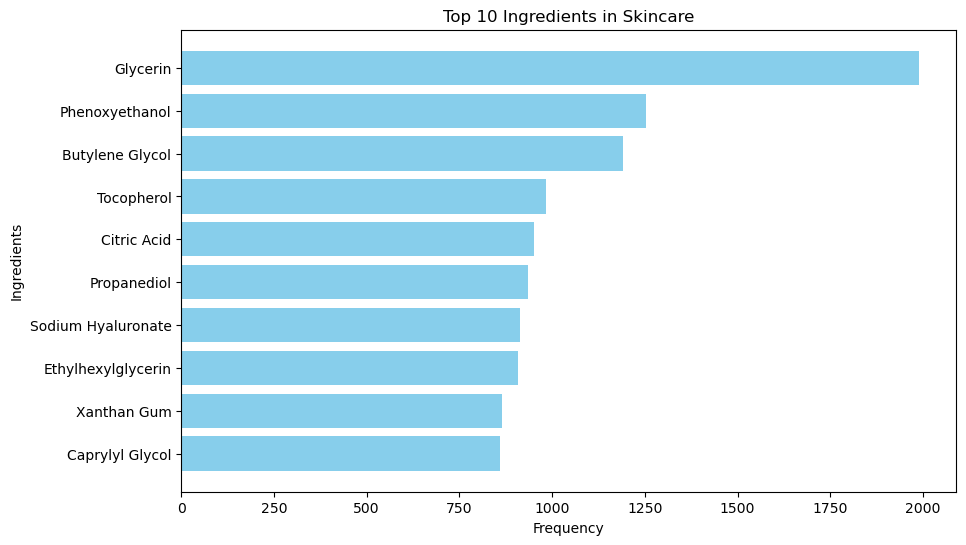

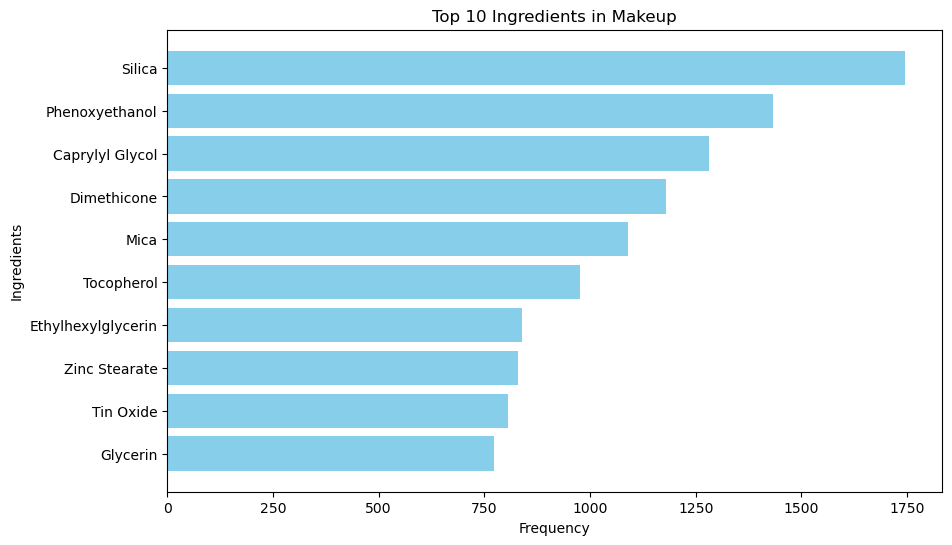

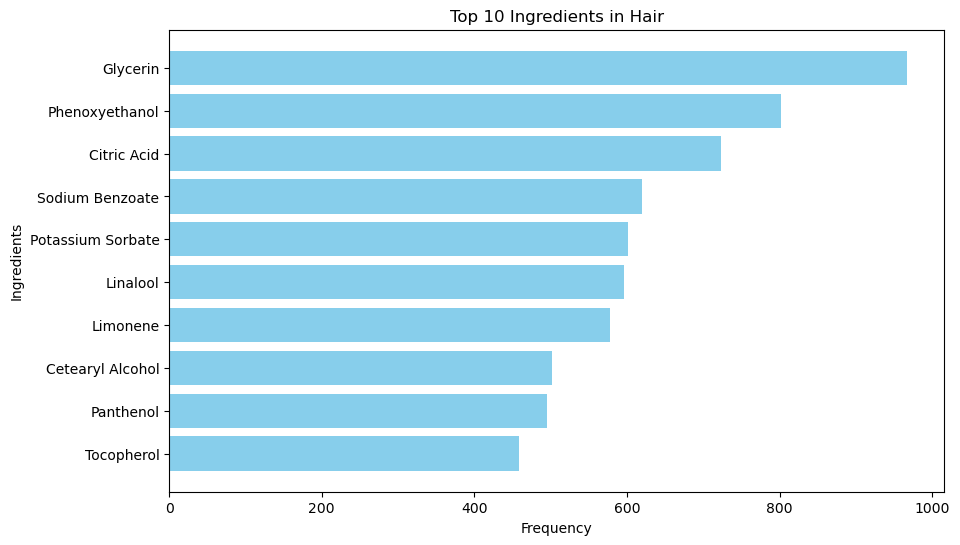

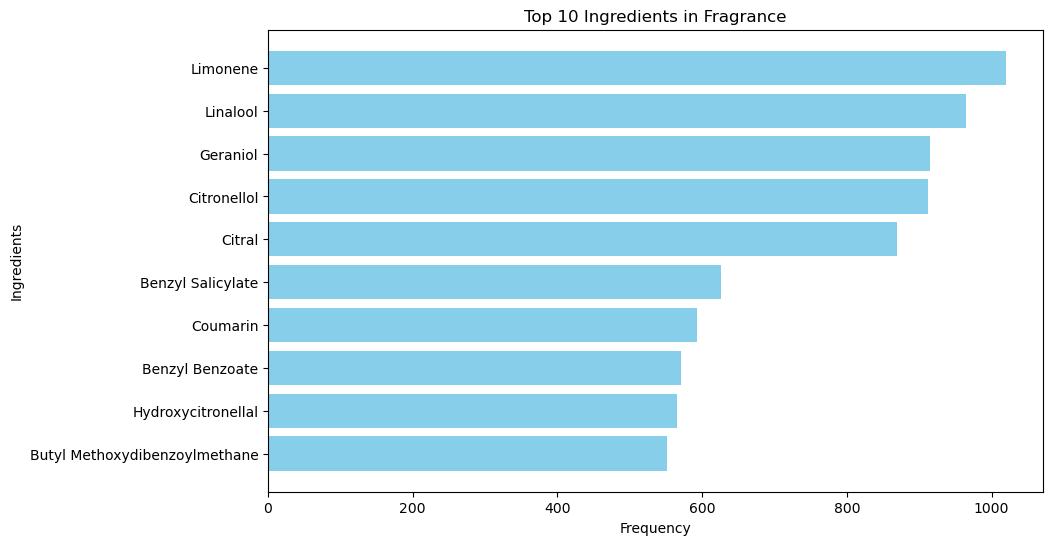

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Create separate DataFrames for each category
skincare_df = data[data['primary_category'] == 'Skincare']
makeup_df = data[data['primary_category'] == 'Makeup']
hair_df = data[data['primary_category'] == 'Hair']
fragrance_df = data[data['primary_category'] == 'Fragrance']

def count_ingredients(df):
    # Flatten the ingredients list by splitting and merging all rows
    all_ingredients = df['ingredients'].dropna().str.split(',').sum()
    # Remove whitespace from each ingredient
    all_ingredients = [ingredient.strip() for ingredient in all_ingredients]
    # Count occurrences of each ingredient
    return Counter(all_ingredients)

skincare_ingredients = count_ingredients(skincare_df)
makeup_ingredients = count_ingredients(makeup_df)
hair_ingredients = count_ingredients(hair_df)
fragrance_ingredients = count_ingredients(fragrance_df)

def plot_top_ingredients(ingredient_counter, category_name, top_n=10):
    # Get the most common ingredients
    ingredients, counts = zip(*ingredient_counter.most_common(top_n))

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(ingredients, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Ingredients')
    plt.title(f'Top {top_n} Ingredients in {category_name}')
    plt.gca().invert_yaxis()  # Reverse the order to match ranking
    plt.show()

plot_top_ingredients(skincare_ingredients, "Skincare")
plot_top_ingredients(makeup_ingredients, "Makeup")
plot_top_ingredients(hair_ingredients, "Hair")
plot_top_ingredients(fragrance_ingredients, "Fragrance")


Visualizing number of common ingredients between each category

<Figure size 1000x800 with 0 Axes>

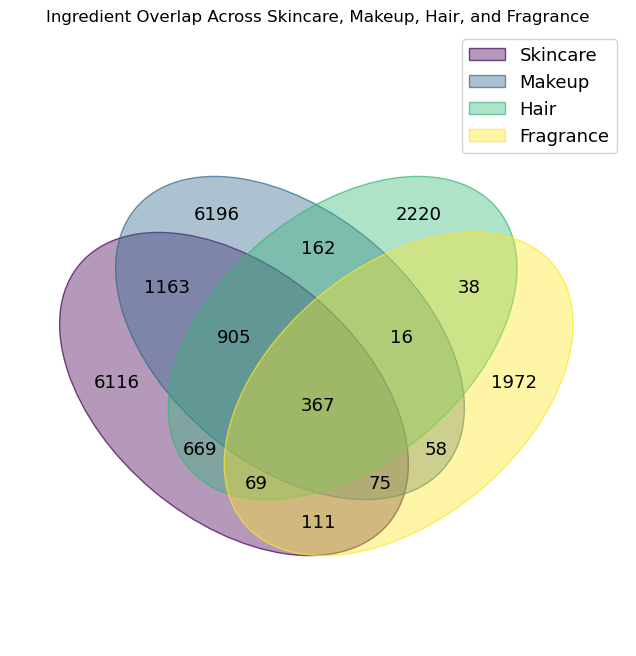

In [6]:
from venn import venn
import matplotlib.pyplot as plt

# function get the set of ingredients per category
def get_ingredient_set(df):
    # Flatten the list of ingredients by splitting and merging all rows
    all_ingredients = df['ingredients'].dropna().str.split(',').sum()
    # Remove whitespace and convert to a set of unique ingredients
    return set([ingredient.strip() for ingredient in all_ingredients])

# Create sets for each category
skincare_ingredients_set = get_ingredient_set(skincare_df)
makeup_ingredients_set = get_ingredient_set(makeup_df)
hair_ingredients_set = get_ingredient_set(hair_df)
fragrance_ingredients_set = get_ingredient_set(fragrance_df)

# Creating dictionaries with sets for each category
category_ingredients = {
    "Skincare": skincare_ingredients_set,
    "Makeup": makeup_ingredients_set,
    "Hair": hair_ingredients_set,
    "Fragrance": fragrance_ingredients_set,
}

# Generating the Venn diagram
plt.figure(figsize=(10, 8))
venn(category_ingredients)
plt.title("Ingredient Overlap Across Skincare, Makeup, Hair, and Fragrance")
plt.show()


Applying Apriori to identify relationships between ingredients

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Load your dataset (assuming it's already loaded as `new_product_info`)
# Ensure the 'ingredients' column is clean and preprocessed

# Split the ingredients column into a list of ingredients for each product
data['ingredients_list'] = data['ingredients'].str.split(',')

# Create a one-hot encoding matrix for the ingredients
all_ingredients = set(ingredient.strip() for sublist in data['ingredients_list'] for ingredient in sublist)
one_hot_encoded = pd.DataFrame([
    {ingredient: (ingredient in ingredients) for ingredient in all_ingredients}
    for ingredients in data['ingredients_list']
])

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support            itemsets
0  0.067465  (['Aqua/Water/Eau)
1  0.067173  (['Alcohol Denat.)
2  0.076081  (['Water/Aqua/Eau)
3  0.122810           (['Water)
4  0.106600      (2-Hexanediol)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [5]:
import os
from itertools import combinations

def read_ingredients(file_path):
    """Read ingredients from a file and return them as a set."""
    with open(file_path, 'r') as file:
        content = file.read()
    # Split by commas, strip whitespace, and convert to lowercase for uniformity
    return set(ingredient.strip().lower() for ingredient in content.split(','))

def find_common_ingredients_between_files(file_paths):
    """Find common ingredients between every pair of files."""
    file_ingredients = {file: read_ingredients(file) for file in file_paths}
    common_ingredients_pairs = {}

    # Compare each pair of files
    for file1, file2 in combinations(file_paths, 2):
        common_ingredients = file_ingredients[file1] & file_ingredients[file2]
        common_ingredients_pairs[(file1, file2)] = common_ingredients

    return common_ingredients_pairs

# Paths to your text files
text_files = ['data/concern_chems.txt', 'data/harmful_ingredients.txt', 'data/red_list.txt', 'data/the_gens.txt']

# Check if all files exist
missing_files = [file for file in text_files if not os.path.exists(file)]
if missing_files:
    print(f"The following files are missing: {', '.join(missing_files)}")
else:
    # Find and print common ingredients for every pair of files
    common_pairs = find_common_ingredients_between_files(text_files)
    for (file1, file2), common in common_pairs.items():
        if common:
            print()
            print(f"Common ingredients between {file1} and {file2}:")
            print(", ".join(common))
        else:
            print()
            print(f"No common ingredients between {file1} and {file2}.")



Common ingredients between data/concern_chems.txt and data/harmful_ingredients.txt:
methylisothiazolinone, benzyl benzoate, citral, benzyl cinnamate, farnesol, coumarin, amyl cinnamal, eugenol, 5-bromo-5-nitro-1

Common ingredients between data/concern_chems.txt and data/red_list.txt:
ethoxylated, 1-hexanol, distillates (petroleum), phenol, 3, 6, 2, 4-(1, 1, 2-hydroxy-

Common ingredients between data/concern_chems.txt and data/the_gens.txt:
glutaral, benzyl benzoate, 2-ethanediyl), cyclohexanol, 3(2h)-isothiazolone, 5-bromo-5-nitro-1, polyethylene, (1r)-2, 1-methyl-4-(1-methylethenyl)-, 4-nonylphenol, biphenyl, distillates (petroleum), 4-dimethylphenol, 1-pentanol, cirtonellol; citral citronellol, 4-tert-butylpyrocatechol, 3-iodo-2-propynyl ester, fd&c yellow 6, butanoic acid, formic acid, camphor, eucalyptus oil, carbamic acid, î±-pinene, hexanoic acid, 2-ethylhexyl salicylate, levomenthol, caryophyllene, 3-tetramethylbutyl)phenyl]-.omega.-hydroxy, triethylene glycol, 2-hydroxy-, 2,